In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.style.use(['seaborn-pastel','dark_background'])
mpl.rcParams['figure.facecolor'] = 'whitesmoke'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.figsize'] = 7, 10
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# show multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fingerprint"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


print("Setup finished!")

Setup finished!


In [2]:
def process(file_name):
    filef = open(file_name, "r")
    line = filef.readline()
    data_dict = {'grid_id': [], 'x': [], 'y': [], 'mac': [], 'type': [], 'rssi': []}
    grid_id = 0
    while True:
            if line.strip() is not '':
                grid_id += 1
                grid_title = line.split(" ")
                print(grid_title)
                grid_pos = [float(grid_title[0]), float(grid_title[1])]
                for i in range(int(grid_title[2])):
                    line = filef.readline().rstrip("\n")
                    record = line.split("|")
                    ap = record[0].split(" ")
                    data_dict['grid_id'].append(grid_id)
                    data_dict['x'].append(grid_pos[0])
                    data_dict['y'].append(grid_pos[1])
                    data_dict['mac'].append(ap[0][0:17])
                    data_dict['type'].append(ap[2])
                    rssi_list = record[1].strip().split(' ') if record[1].strip() != '' else [ap[1]]
                    data_dict['rssi'].append(float(np.array(rssi_list).astype(np.float).mean()))
            line = filef.readline()
            if not line:
                break
    filef.close()
    data_frame = pd.DataFrame.from_dict(data_dict)
    grouped_df = data_frame.groupby(by=['x','y'])
    sorted_mac = None
    filter_mac = None
    use_type = 'w'
    grid_sum = len(grouped_df.groups)
    if not sorted_mac:
        mac = set(data_frame[data_frame['type'] == use_type]['mac'].unique())
        sorted_mac = sorted(mac & filter_mac if filter_mac else mac)
    grouped = data_frame.groupby(by=['grid_id'])
    grid_sum = len(grouped.groups)
    theta = np.full(shape=(grid_sum, len( sorted_mac)), fill_value=-100.)
    grid_index = 0
    grid_position = np.full(shape=(grid_sum, 2), fill_value=0)
    for name, group in grouped:
            for index, row in group.iterrows():
                if row['mac'] in sorted_mac:
                    ap_index = sorted_mac.index(row['mac'])
                    theta[grid_index, ap_index] = row['rssi']
            grid_position[grid_index] = [group["x"].mean(), group['y'].mean()]
            grid_index += 1 
    data = {"theta": theta, "position": grid_position}
    df = pd.DataFrame({k:list(v) for k,v in data.items()})
    return df

In [3]:
file_name = "train11_16.txt"

In [4]:
filef = open(file_name, "r")
line = filef.readline()
data_dict = {'grid_id': [], 'x': [], 'y': [], 'mac': [], 'type': [], 'rssi': []}
grid_id = 0
while True:
            if line.strip() is not '':
                grid_id += 1
                grid_title = line.split(" ")
                print(grid_title)
                grid_pos = [float(grid_title[0]), float(grid_title[1])]
                for i in range(int(grid_title[2])):
                    line = filef.readline().rstrip("\n")
                    record = line.split("|")
                    ap = record[0].split(" ")
                    data_dict['grid_id'].append(grid_id)
                    data_dict['x'].append(grid_pos[0])
                    data_dict['y'].append(grid_pos[1])
                    data_dict['mac'].append(ap[0][0:17])
                    data_dict['type'].append(ap[2])
                    rssi_list = record[1].strip().split(' ') if record[1].strip() != '' else [ap[1]]
                    data_dict['rssi'].append(float(np.array(rssi_list).astype(np.float).mean()))
            line = filef.readline()
            if not line:
                break
filef.close()

['8.00', '1.00', '18', '2020-11-16-00:56:44\n']
['8.00', '1.00', '18', '2020-11-16-00:57:20\n']
['8.00', '2.00', '18', '2020-11-16-00:57:35\n']
['7.00', '2.00', '18', '2020-11-16-00:57:49\n']
['6.00', '2.00', '18', '2020-11-16-00:57:59\n']
['4.00', '2.00', '18', '2020-11-16-00:58:17\n']
['5.00', '1.00', '18', '2020-11-16-00:58:29\n']
['5.00', '1.00', '19', '2020-11-16-00:58:46\n']
['5.00', '3.00', '19', '2020-11-16-00:59:11\n']
['4.00', '5.00', '19', '2020-11-16-00:59:26\n']
['6.00', '5.00', '19', '2020-11-16-00:59:41\n']
['6.00', '5.00', '19', '2020-11-16-01:00:00\n']
['6.00', '4.00', '19', '2020-11-16-01:00:09\n']
['2.00', '5.00', '19', '2020-11-16-01:00:29\n']
['2.00', '3.00', '19', '2020-11-16-01:00:41\n']
['3.00', '4.00', '16', '2020-11-16-01:01:41\n']
['2.00', '1.00', '16', '2020-11-16-01:01:59\n']
['3.00', '1.00', '16', '2020-11-16-01:02:15\n']


In [5]:
data_frame = pd.DataFrame.from_dict(data_dict)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   grid_id  326 non-null    int64  
 1   x        326 non-null    float64
 2   y        326 non-null    float64
 3   mac      326 non-null    object 
 4   type     326 non-null    object 
 5   rssi     326 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 15.4+ KB


In [6]:
data_frame

,grid_id,x,y,mac,type,rssi
0,1,8.0,1.0,70:8b:cd:5e:4f:f0,w,-88.0
1,1,8.0,1.0,04:bd:88:76:f9:f1,w,-46.0
2,1,8.0,1.0,04:bd:88:76:f9:e0,w,-51.0
3,1,8.0,1.0,04:bd:88:76:f9:f0,w,-45.0
4,1,8.0,1.0,04:bd:88:76:f9:e2,w,-49.0
...,...,...,...,...,...,...
321,18,3.0,1.0,04:bd:88:76:f4:21,w,-86.0
322,18,3.0,1.0,04:bd:88:76:f4:20,w,-87.0
323,18,3.0,1.0,04:bd:88:77:07:22,w,-90.0
324,18,3.0,1.0,04:bd:88:76:f5:81,w,-88.0


In [7]:
grouped_df = data_frame.groupby(by=['x','y'])
# for key,item in grouped_df:
#     a_group = grouped_df.get_group(key)
#     print(a_group, "\n")
sorted_mac = None
filter_mac = None
use_type = 'w'
grid_sum = len(grouped_df.groups)
if not sorted_mac:
    mac = set(data_frame[data_frame['type'] == use_type]['mac'].unique())
    sorted_mac = sorted(mac & filter_mac if filter_mac else mac)
sorted_mac

['04:bd:88:76:f4:20',
 '04:bd:88:76:f4:21',
 '04:bd:88:76:f4:22',
 '04:bd:88:76:f4:30',
 '04:bd:88:76:f4:31',
 '04:bd:88:76:f4:32',
 '04:bd:88:76:f5:80',
 '04:bd:88:76:f5:81',
 '04:bd:88:76:f5:82',
 '04:bd:88:76:f6:92',
 '04:bd:88:76:f9:e0',
 '04:bd:88:76:f9:e1',
 '04:bd:88:76:f9:e2',
 '04:bd:88:76:f9:f0',
 '04:bd:88:76:f9:f1',
 '04:bd:88:76:f9:f2',
 '04:bd:88:77:07:22',
 '04:bd:88:77:08:20',
 '04:bd:88:77:08:21',
 '18:64:72:29:09:c0',
 '18:64:72:29:09:c1',
 '18:64:72:29:09:c2',
 '62:45:b6:ce:ac:21',
 '70:8b:cd:5e:4f:f0',
 '84:d4:7e:4a:4b:e2',
 '84:d4:7e:4a:68:02']

In [8]:
# Download the California image
import urllib.request
# url = "https://www.mines.edu/residence-life/wp-content/uploads/sites/46/2019/11/2-Bedroom-Units-1-112.jpg"
url = "https://www.mines.edu/residence-life/wp-content/uploads/sites/46/2019/11/2-Bedroom-Units-113-272-300x222.jpg"
print("Downloading", url)
req = urllib.request.Request(url)
# Customize the default User-Agent header value:
req.add_header('User-Agent', 'Mozilla/5.0')
response = urllib.request.urlopen(req)
image = response.read()
filename = "minespark.jpg"
with open(os.path.join(IMAGES_PATH, filename), "wb") as file:
    file.write(image)

10135

Saving figure california_housing_prices_plot


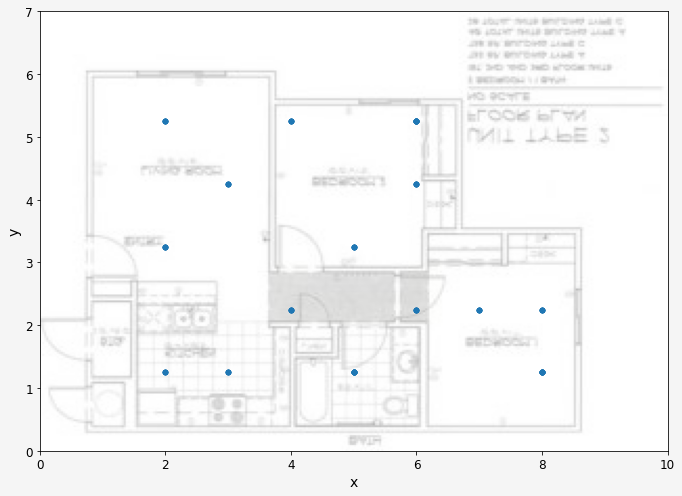

In [9]:
import matplotlib.image as mpimg
import cv2
tmpdata = data_frame.copy()
tmpdata["y"] += 0.25
housing_img=mpimg.imread(os.path.join(IMAGES_PATH, filename))
housing_img = cv2.flip(housing_img, 0)
ax = tmpdata.plot(kind="scatter", x="x", y="y", alpha=0.5,
    figsize=(10,7),
    sharex=False)
plt.gca().invert_yaxis()
plt.imshow(housing_img, extent=[0, 10, 0, 7],alpha=0.5,
           cmap=plt.get_cmap("jet"))

save_fig("california_housing_prices_plot")
plt.show()

In [10]:
grouped = data_frame.groupby(by=['grid_id'])
grid_sum = len(grouped.groups)

In [11]:
theta = np.full(shape=(grid_sum, len( sorted_mac)), fill_value=-100.)
grid_index = 0
grid_position = np.full(shape=(grid_sum, 2), fill_value=0)
for name, group in grouped:
            for index, row in group.iterrows():
                if row['mac'] in sorted_mac:
                    ap_index = sorted_mac.index(row['mac'])
                    theta[grid_index, ap_index] = row['rssi']
            grid_position[grid_index] = [group["x"].mean(), group['y'].mean()]
            grid_index += 1

In [12]:
data = {"theta": theta, "position": grid_position}
data

{'theta': array([[ -76.,  -76.,  -80., -100.,  -87., -100.,  -81.,  -81.,  -79.,
          -88.,  -51.,  -51.,  -49.,  -45.,  -46.,  -45., -100., -100.,
         -100.,  -87.,  -88.,  -87., -100.,  -88., -100., -100.],
        [ -76.,  -76.,  -80., -100.,  -87., -100.,  -81.,  -81.,  -79.,
          -88.,  -51.,  -51.,  -49.,  -45.,  -46.,  -45., -100., -100.,
         -100.,  -87.,  -88.,  -87., -100.,  -88., -100., -100.],
        [ -76.,  -76.,  -80., -100.,  -87., -100.,  -81.,  -81.,  -79.,
          -88.,  -51.,  -51.,  -49.,  -45.,  -46.,  -45., -100., -100.,
         -100.,  -87.,  -88.,  -87., -100.,  -88., -100., -100.],
        [ -76.,  -76.,  -80., -100.,  -87., -100.,  -81.,  -81.,  -79.,
          -88.,  -51.,  -51.,  -49.,  -45.,  -46.,  -45., -100., -100.,
         -100.,  -87.,  -88.,  -87., -100.,  -88., -100., -100.],
        [ -76.,  -76.,  -80., -100.,  -87., -100.,  -81.,  -81.,  -79.,
          -88.,  -51.,  -51.,  -49.,  -45.,  -46.,  -45., -100., -100.,
       

In [13]:
df = pd.DataFrame({k:list(v) for k,v in data.items()})

In [14]:
df

,theta,position
0,"[-76.0, -76.0, -80.0, -100.0, -87.0, -100.0, -...","[8, 1]"
1,"[-76.0, -76.0, -80.0, -100.0, -87.0, -100.0, -...","[8, 1]"
2,"[-76.0, -76.0, -80.0, -100.0, -87.0, -100.0, -...","[8, 2]"
3,"[-76.0, -76.0, -80.0, -100.0, -87.0, -100.0, -...","[7, 2]"
4,"[-76.0, -76.0, -80.0, -100.0, -87.0, -100.0, -...","[6, 2]"
5,"[-76.0, -76.0, -80.0, -100.0, -87.0, -100.0, -...","[4, 2]"
6,"[-76.0, -76.0, -80.0, -100.0, -87.0, -100.0, -...","[5, 1]"
7,"[-71.0, -71.0, -69.0, -86.0, -85.0, -85.0, -75...","[5, 1]"
8,"[-71.0, -71.0, -69.0, -86.0, -85.0, -85.0, -75...","[5, 3]"
9,"[-71.0, -71.0, -69.0, -86.0, -85.0, -85.0, -75...","[4, 5]"


In [15]:
df["theta"][16]

array([ -87.,  -86.,  -85., -100., -100., -100.,  -86.,  -88., -100.,
       -100.,  -57.,  -57.,  -55.,  -67.,  -67.,  -67.,  -90.,  -87.,
        -88., -100., -100., -100.,  -66., -100.,  -91., -100.])

In [16]:
def plot(target, predit):
    housing_img=mpimg.imread(os.path.join(IMAGES_PATH, filename))
    housing_img = cv2.flip(housing_img, 0)
    plt.scatter(target[:, 0], target[:, 1], c='b', marker='s', label='-1')
    for i in range(target.shape[0]):
        plt.text(target[i, 0], target[i, 1], str(i))

    plt.scatter(predict[:, 0], predict[:, 1], c='r', marker='s', label='-1')
    for i in range(predict.shape[0]):
        plt.text(predict[i,0], predict[i,1], str(i))

    plt.imshow(housing_img, extent=[0, 10, 0, 7],alpha=0.5,
            cmap=plt.get_cmap("jet"))

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [18]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [19]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [21]:
from sklearn.model_selection import cross_val_predict, cross_val_score

predict = cross_val_predict(knn, data["theta"], data["position"],
                         method="predict", cv=3)
                        
# predict

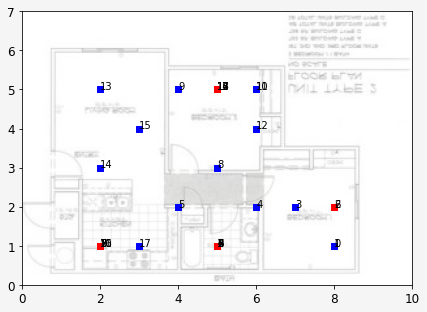

In [22]:
target = data["position"]
plot(target, predict)

In [23]:
# {'target': target, 'predict': predict}

In [24]:
score = cross_val_score(knn, data["theta"], data["position"],
                         scoring="neg_root_mean_squared_error", cv=3)

In [25]:
score

array([-1.58085223, -3.10623138, -2.48305061])

In [27]:
test_df = process('test11_16.txt')

['2.00', '1.00', '16', '2020-11-16-01:02:36\n']
['2.00', '4.00', '16', '2020-11-16-01:02:52\n']
['5.00', '1.00', '16', '2020-11-16-01:03:05\n']
['5.00', '4.00', '16', '2020-11-16-01:03:25\n']
['8.00', '2.00', '21', '2020-11-16-01:04:43\n']


In [31]:
test_df

,theta,position
0,"[-87.0, -86.0, -85.0, -86.0, -88.0, -100.0, -1...","[2, 1]"
1,"[-87.0, -86.0, -85.0, -86.0, -88.0, -100.0, -1...","[2, 4]"
2,"[-87.0, -86.0, -85.0, -86.0, -88.0, -100.0, -1...","[5, 1]"
3,"[-87.0, -86.0, -85.0, -86.0, -88.0, -100.0, -1...","[5, 4]"
4,"[-81.0, -80.0, -100.0, -100.0, -84.0, -79.0, -...","[8, 2]"
